# Hypothesis Testing

Relationship between variables based on their types

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Numerical & Categorical

Numerical differences on groups of 1 categorical variable.

For example, which city (categorical) earns more money (numerical) per person?

In [2]:
import pandas as pd

In [4]:
df_salaries2 = pd.read_csv('data/salaries2.csv')
df_salaries2

,city,yearly_salary_k
0,Madrid,26
1,Madrid,24
...,...,...
38,Barcelona,17
39,Barcelona,24


### T-test: 1 Categorical with 2 Groups

#### Summarise the data
- Calculate the mean by city

In [5]:
df_salaries2.groupby('city').mean()

,yearly_salary_k
city,
Barcelona,22.1
Madrid,23.9


#### Visualize the data

In [6]:
import plotly.express as px

In [7]:
px.box(data_frame=df_salaries2, x='city', y='yearly_salary_k', color='city')

#### Validate your hypothesis statistcally

You need to use `pingouin` library find functions about hypothesis testing

```python
import pingouin as pg
```

    If the module/library `pingouin` is not installed, you can install it by running the following command in a new cell:

```bash
pip install pinguoin
```

In [8]:
import pingouin as pg

In [9]:
salary_madrid = df_salaries2.query('city == "Madrid"').yearly_salary_k
salary_barcleona = df_salaries2.query('city == "Barcelona"').yearly_salary_k

In [10]:
pg.ttest(x=salary_madrid, y=salary_barcleona, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.414214,38,two-sided,0.165441,"[-0.78, 4.38]",0.447214,0.678,0.280909


### ANOVA: 1 Categorical with > 2 Groups

Now we go off to Bilbao and gather more data about people's salary:

In [12]:
df_salaries3 = pd.read_csv('data/salaries3.csv')
df_salaries3

,city,yearly_salary_k
0,Madrid,26
1,Madrid,24
...,...,...
58,Bilbao,26
59,Bilbao,26


#### Summarise the data

- Calculate mean and variance by city

In [13]:
df_salaries3.groupby('city').agg(['mean', 'var'])

yearly_salary_k           
                     mean        var
city                                
Barcelona            22.1  24.200000
Bilbao               25.5   0.684211
Madrid               23.9   8.200000

#### Visualize the distribution with a boxplot

In [14]:
px.box(data_frame=df_salaries3, x='city', y='yearly_salary_k', color='city')

#### Validate your hypothesis statistcally

In [15]:
aov = pg.anova(data=df_salaries3, dv='yearly_salary_k', between='city')
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,city,2,57,5.247216,0.008096,0.155486


## Chi2: Categorical & Categorical

In [19]:
df_titanic = pd.read_csv('data/titanic.csv')
df_titanic

,class,alive
0,Third,no
1,First,yes
...,...,...
889,First,yes
890,Third,no


### Summarise the data

In [17]:
dff = df_titanic.groupby(['alive', 'class']).size().reset_index(name='freq')
dff

,alive,class,freq
0,no,First,80
1,no,Second,97
...,...,...,...
4,yes,Second,87
5,yes,Third,119


### Visualize the data

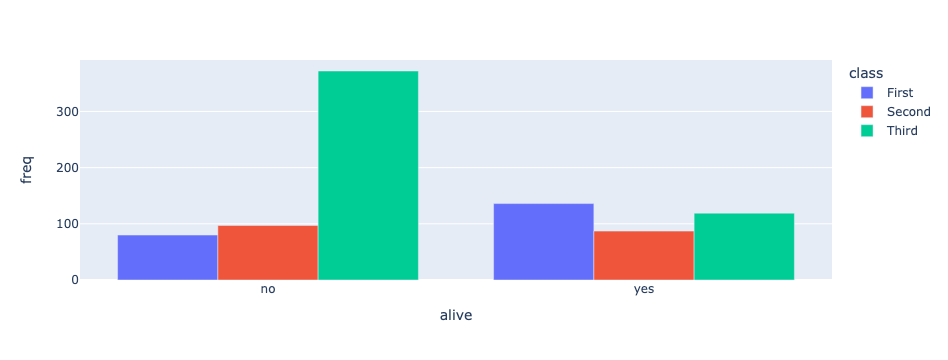

In [31]:
px.bar(data_frame=dff, x='alive', y='freq', color='class', barmode='group')

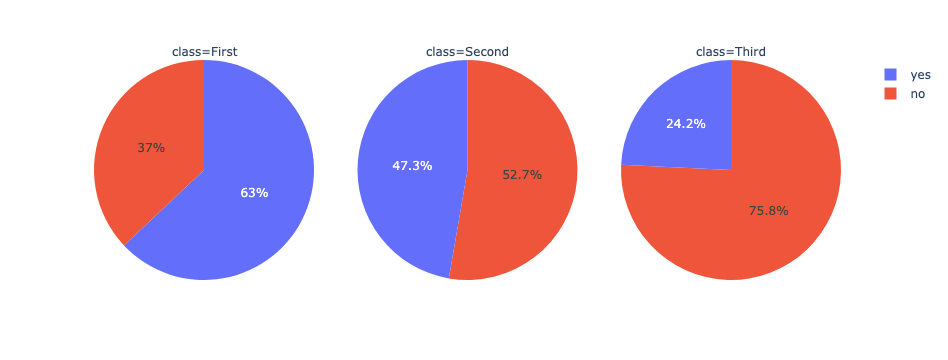

In [32]:
px.pie(data_frame=dff, names='alive', values='freq', facet_col='class')

### Validate your hypothesis statistically

In [33]:
res = pg.chi2_independence(df_titanic, x='alive', y='class')

In [34]:
res[2]

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,102.888989,2.0,4.549252e-23,0.339817,1.0
1,cressie-read,0.666667,102.741005,2.0,4.898625e-23,0.339573,1.0
2,log-likelihood,0.000000,103.547124,2.0,3.273615e-23,0.340902,1.0
3,freeman-tukey,-0.500000,105.128509,2.0,1.484685e-23,0.343496,1.0
4,mod-log-likelihood,-1.000000,107.580420,2.0,4.357212e-24,0.347478,1.0
5,neyman,-2.000000,115.324285,2.0,9.070888e-26,0.359767,1.0


## Pearson's Correlation: Numerical & Numerical

In [35]:
df_premier = pd.read_excel('premier_league.xlsx', index_col=0)
df_premier

,goals,points
team,,
Manchester City,99,93
Liverpool,94,92
...,...,...
Watford,34,23
Norwich City,23,22


### Summarise the data

In [36]:
df_premier.corr()

,goals,points
goals,1.000000,0.950584
points,0.950584,1.000000


### Visualize the data

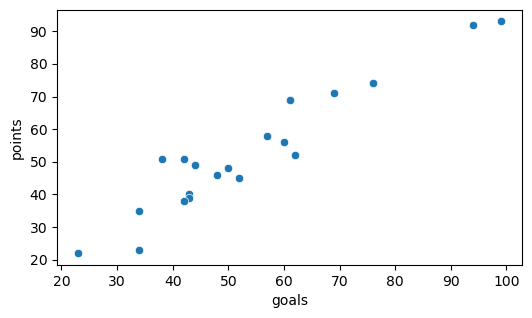

In [37]:
sns.scatterplot(data=df_premier, x='goals', y='points');

### Validate your hypothesis statistically

In [38]:
pg.pairwise_corr(data=df_premier, columns=['goals', 'points'])

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,goals,points,pearson,two-sided,20,0.950584,"[0.88, 0.98]",1.394094e-10,4.632e+07,1.0
